In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier



In [11]:
# Imposta un seed per la riproducibilità
np.random.seed(42)

# Genera dati sintetici
n_samples = 500

# Variabili categoriche
sesso = np.random.choice(['M', 'F'], size=n_samples)
regione_residenza = np.random.choice(['Nord', 'Centro', 'Sud'], size=n_samples)
tipologia_professionista_sanitario = np.random.choice(['Medico', 'Infermiere', 'Tecnico'], size=n_samples)

# Variabili numeriche
eta = np.random.randint(20, 65, size=n_samples)
num_servizi = np.random.poisson(lam=5, size=n_samples)

# Generazione della variabile target (incremento) come categorica
incremento_val = (eta * 0.2) + (num_servizi * 2) + np.random.normal(0, 10, size=n_samples)

# Trasformazione di incremento in categorie (es. Basso, Medio, Alto) direttamente all'origine
percentili = np.percentile(incremento_val, [33, 66])
incremento = pd.cut(incremento_val, bins=[-np.inf, percentili[0], percentili[1], np.inf], labels=['Basso', 'Medio', 'Alto'])

# Creazione del DataFrame
df = pd.DataFrame({
    'sesso': sesso,
    'regione_residenza': regione_residenza,
    'tipologia_professionista_sanitario': tipologia_professionista_sanitario,
    'eta': eta,
    'num_servizi': num_servizi,
    'incremento': incremento
})

df.head()


,sesso,regione_residenza,tipologia_professionista_sanitario,eta,num_servizi,incremento
0,M,Sud,Infermiere,38,3,Basso
1,F,Nord,Medico,55,2,Medio
2,M,Nord,Medico,48,5,Alto
3,M,Sud,Infermiere,37,4,Alto
4,M,Nord,Infermiere,21,5,Alto


In [12]:
# Seleziona le colonne categoriche
categorical_cols = ['sesso', 'regione_residenza', 'tipologia_professionista_sanitario']

# One-Hot Encoding
encoder = OneHotEncoder(drop='first')
encoded_categorical_cols = encoder.fit_transform(df[categorical_cols])

# Converti in DataFrame
encoded_df = pd.DataFrame(encoded_categorical_cols.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Unisci con le colonne numeriche
X = pd.concat([encoded_df, df[['eta', 'num_servizi']]], axis=1)
y = df['incremento']

In [13]:
# Inizializza e addestra il modello di classificazione
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Ottieni l'importanza delle feature
feature_importance = model.feature_importances_

# Creazione di un DataFrame per visualizzare i risultati
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
5,eta,0.500512
6,num_servizi,0.286829
0,sesso_M,0.050027
1,regione_residenza_Nord,0.044728
4,tipologia_professionista_sanitario_Tecnico,0.042882
2,regione_residenza_Sud,0.038132
3,tipologia_professionista_sanitario_Medico,0.036891


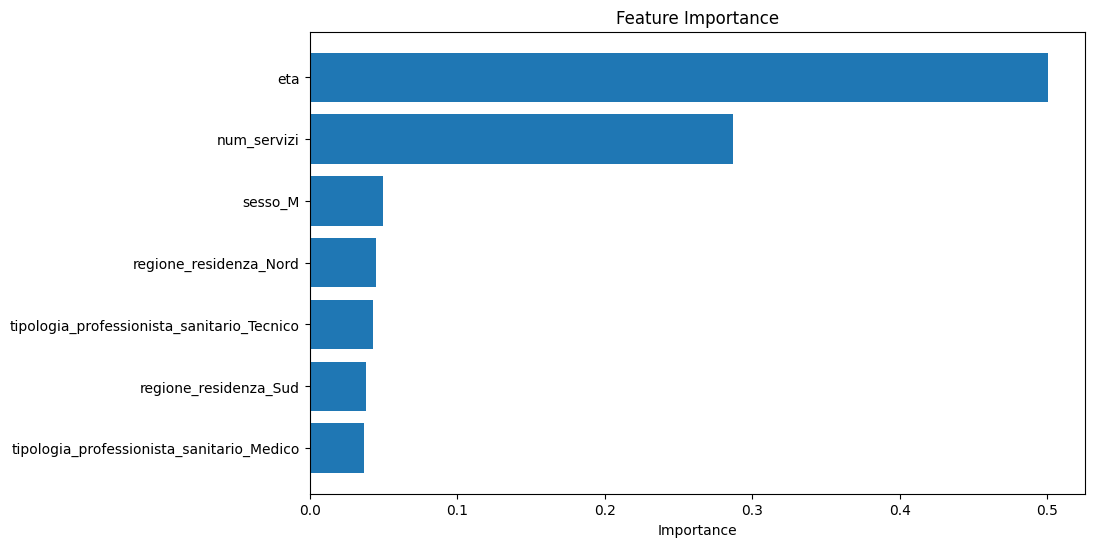

In [14]:
# Visualizzazione con un grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverte l'asse y per avere la feature più importante in cima
plt.show()